# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

## Analysis Findings

- The findings of these analyses showed that there is a higher temperature for cities that are found closer to the equator (Latitude 0). However, the strenth of the relationship is stronger when you go North versus South as the temperature decreases more than iit decreases if you go south. The regression line is a better fit for the northern hemisphere vs southern, making it more effective at predicting the relationship between latitude and temperature. The differences in the strength of the relationship could be related to the northern hemisphere having about twice as many cities in its dataset compared to the southern hemisphere. Maybe if they both had equal numbers of cities the relationships would be more similar.
- The findings of these analyses showed that there was little to no relationship between latitude and cloudiness for cities found closer or farther to equator. So, we can infer that cloudiness can be fairly distributed in both northern and southern hemisphere cities regardless of their distance from the equator. 
-  The findings of these analyses showed that the correlation between latitude and humidity is stronger in the Northern Hemisphere compared to the Southern Hemisphere, as evidenced by the higher correlation coefficient and r-squared value. However, the relationship in both hemispheres is not particularly strong, indicating that latitude is not a very reliable predictor of humidity. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | octeville
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | spirit river
Processing Record 8 of Set 1 | bindki
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | sur
Processing Record 11 of Set 1 | cururupu
Processing Record 12 of Set 1 | koumac
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | aflu
City not found. Skipping...
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | muli
Processing Record 19 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | kirakira
Processing Record

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_weather_df = pd.DataFrame(city_data)

# Show Record Count
city_weather_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [8]:
# Display sample data
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,77.16,88,20,6.91,TO,1681319144
1,mataura,-46.1927,168.8643,52.48,99,100,4.92,NZ,1681319150
2,octeville,49.6261,-1.6435,46.18,87,100,33.38,FR,1681319575
3,arraial do cabo,-22.9661,-42.0278,82.36,69,40,18.41,BR,1681319147
4,norman wells,65.2820,-126.8329,25.07,88,99,6.24,CA,1681319304


In [9]:
# Export the City_Data into a csv
city_weather_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,77.16,88,20,6.91,TO,1681319144
1,mataura,-46.1927,168.8643,52.48,99,100,4.92,NZ,1681319150
2,octeville,49.6261,-1.6435,46.18,87,100,33.38,FR,1681319575
3,arraial do cabo,-22.9661,-42.0278,82.36,69,40,18.41,BR,1681319147
4,norman wells,65.2820,-126.8329,25.07,88,99,6.24,CA,1681319304


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

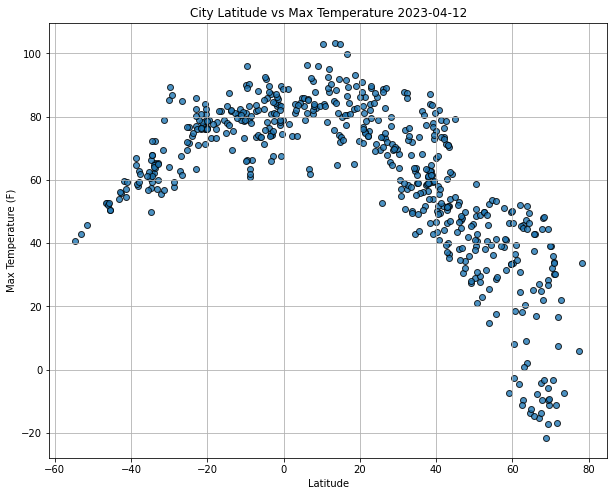

In [11]:
# Build scatter plot for latitude vs. temperature
from datetime import datetime
date_time = datetime.date(datetime.now())
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {date_time}")
plt.grid()

# Save the figure
plt.savefig("output_data/latitude_vs_temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

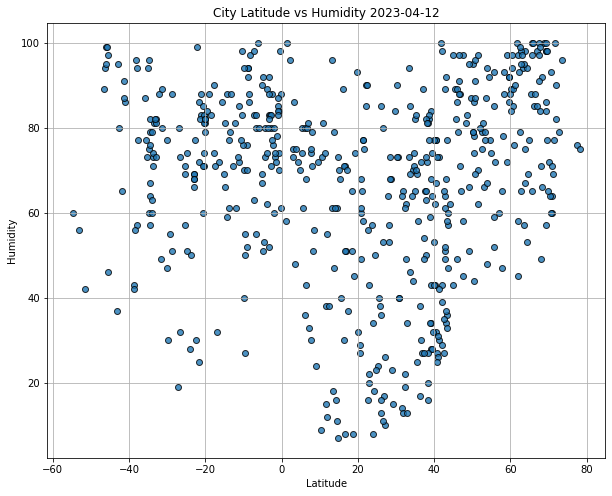

In [12]:
from datetime import datetime
date_time = datetime.date(datetime.now())
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"City Latitude vs Humidity {date_time}")
plt.grid()

# Save the figure
plt.savefig("output_data/latitude_vs_humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

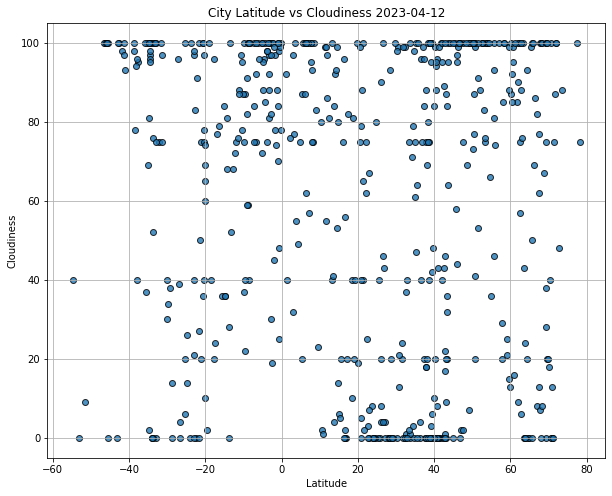

In [13]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs Cloudiness {date_time}")
plt.grid()

# Save the figure
plt.savefig("output_data/latitude_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

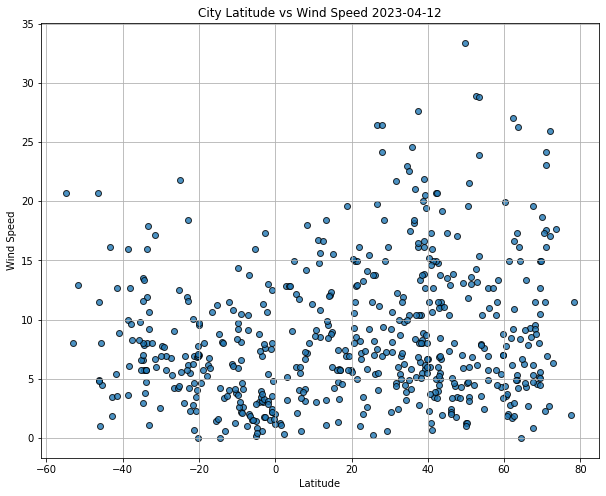

In [14]:
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"City Latitude vs Wind Speed {date_time}")
plt.grid()

# Save the figure
plt.savefig("output_data/latitude_vs_windspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot linear regression line and equation
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # x and y limits and labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.title(f"{title} Hemisphere - {xlabel} vs {ylabel} {date_time}",fontsize = 15)

    # Print r-squared value
    print(f"The correlation coefficient is: {rvalue}")
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,octeville,49.6261,-1.6435,46.18,87,100,33.38,FR,1681319575
4,norman wells,65.2820,-126.8329,25.07,88,99,6.24,CA,1681319304
6,spirit river,55.7833,-118.8361,41.29,59,46,6.89,CA,1681319576
7,bindki,26.0333,80.6000,88.74,13,90,5.37,IN,1681319576
9,sur,22.5667,59.5289,83.89,56,3,7.16,OM,1681319292


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,77.16,88,20,6.91,TO,1681319144
1,mataura,-46.1927,168.8643,52.48,99,100,4.92,NZ,1681319150
3,arraial do cabo,-22.9661,-42.0278,82.36,69,40,18.41,BR,1681319147
5,kaitangata,-46.2817,169.8464,52.77,94,100,11.50,NZ,1681319156
8,atuona,-9.8000,-139.0333,81.05,70,100,14.32,PF,1681319142


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient is: -0.837916799155931
The r-squared is: 0.7021045623077208


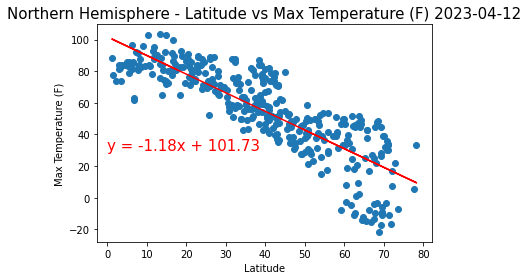

In [67]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temperature (F)', 'Northern', (0,30))

The correlation coefficient is: 0.7590763040888394
The r-squared is: 0.5761968354291722


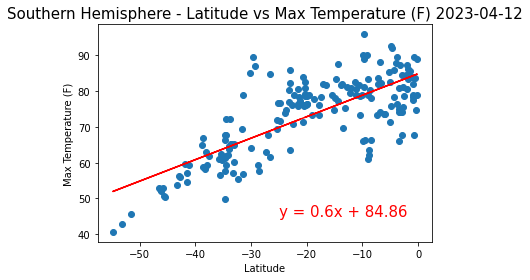

In [68]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temperature (F)', 'Southern', (-25,45))

**Discussion about the linear relationship:** When comparing the both the Northern and Southern Hemisphere Latitude vs Max Temperature, the Northern has a strong negative linear relationship and the Southern has a moderately strong weak positive linear relationship based on the correlation coefficients and r-squared values provided. 

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.4138024952816727
The r-squared is: 0.17123250510133875


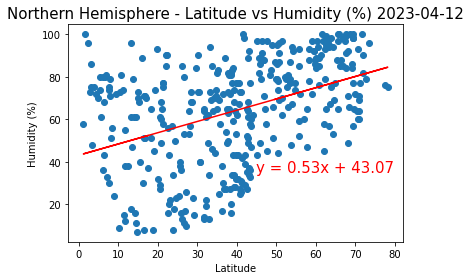

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity (%)', 'Northern', (45,35))

The correlation coefficient is: 0.11155600864727448
The r-squared is: 0.012444743065310779


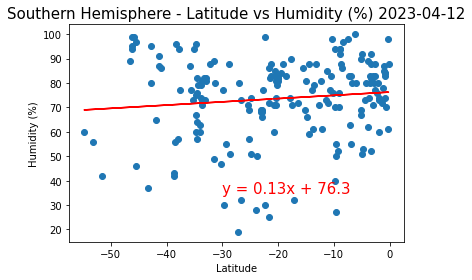

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity (%)', 'Southern', (-30,35))

**Discussion about the linear relationship:** When comparing the both the Northern and Southern Hemisphere Latitude vs Wind Speed, the Northern has a weak positive linear relationship while the Southern has a weak nonexistent linear relationship based on the correlation coefficients and r-squared values provided.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.06575985307069766
The r-squared is: 0.004324358275879745


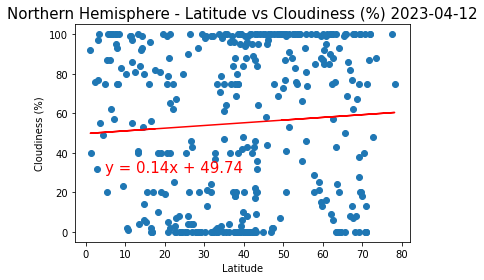

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness (%)', 'Northern', (5,30))

The correlation coefficient is: 0.1668961580042215
The r-squared is: 0.02785432755657007


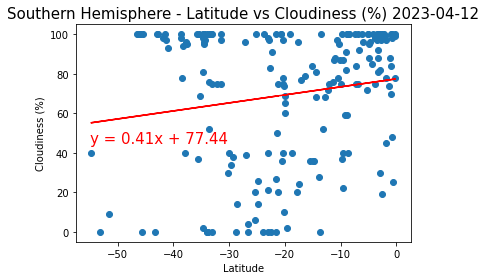

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness (%)', 'Southern', (-55,45))

**Discussion about the linear relationship:** When comparing the both the Northern and Southern Hemisphere Latitude vs Cloudiness, both have a little to no linear relationship based on the correlation coefficients and r-squared values provided.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.06261569844849191
The r-squared is: 0.003920725692192472


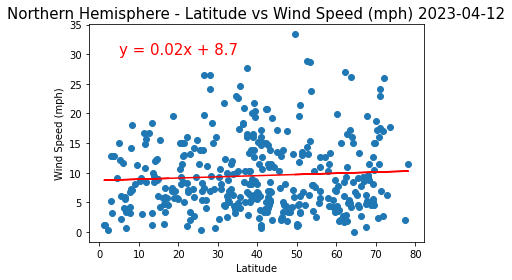

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed (mph)', 'Northern', (5,30))

The correlation coefficient is: -0.32834089221653673
The r-squared is: 0.10780774150155138


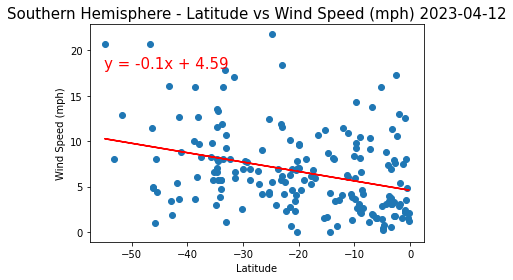

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed (mph)', 'Southern', (-55,18))

**Discussion about the linear relationship:** 
When comparing the both the Northern and Southern Hemisphere Latitude vs Wind Speed, the Northern has an almost nonexistent linear relationship and the Southern has a weak negative linear relationship based on the correlation coefficients and r-squared values provided.